In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [84]:
# Import data
data = pd.read_fwf('copper-new.txt', sep=',',header=None)

In [85]:
data

,0,1
0,0.591,24.41
1,4.703,54.98
2,9.470,89.57
3,11.615,114.26
4,12.970,133.61
5,15.190,202.14
6,16.131,250.99
7,16.872,321.31
8,16.966,333.47
9,17.355,373.79


In [38]:
# Separate the X and Y variables
temperature = data.iloc[:,1].values.tolist()
coeff = data.iloc[:,0].values.tolist()

In [39]:
X = np.array(temperature).reshape(-1,1)
Y = np.array(coeff)

# Part a

In [42]:
# Fit a linear regression model
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

regression = LinearRegression()
regression.fit(xtrain,ytrain)
prediction = regression.predict(xtest)

In [43]:
print("The MSE of the model is {:.2f}".format(mean_squared_error(ytest,prediction)))
print("The intercept is {:.4f}".format(regression.intercept_))
print("The coefficient is {:.4f}".format(regression.coef_[0]))

The MSE of the model is 12.48
The intercept is 7.7156
The coefficient is 0.0205


# Part b

In [44]:
# Fit a ridge regression model using a polynomial
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

polynomial = PolynomialFeatures(4)
ridge = Ridge()

# Convert input matrix to polynomial with n=4
polyxtrain = polynomial.fit_transform(xtrain)
polyxtest = polynomial.fit_transform(xtest)

ridge.fit(polyxtrain,ytrain) 

prediction = ridge.predict(polyxtest)

In [45]:
mean_squared_error(ytest,prediction)

0.1889319549018079

# Part c

In [73]:
# Using K Folds to cross validate
error=[]
lambdavec=[]

for i in range(-5000,5000):
    scores = []
    poly = PolynomialFeatures(4)
    ridge = Ridge(alpha=i)

    cv = KFold(n_splits=5, random_state=20, shuffle=True)

    for trainIndex, testIndex in cv.split(X):

        xtrain, xtest, ytrain, ytest = X[trainIndex], X[testIndex], Y[trainIndex], Y[testIndex]
        polyxtrain = poly.fit_transform(xtrain)
        polyxtest = poly.fit_transform(xtest)
        
        ridge.fit(polyxtrain, ytrain)
        
        prediction = ridge.predict(polyxtest)
        scores.append(mean_squared_error(prediction, ytest))
    

    error.append(np.mean(scores))
    lambdavec.append(i)

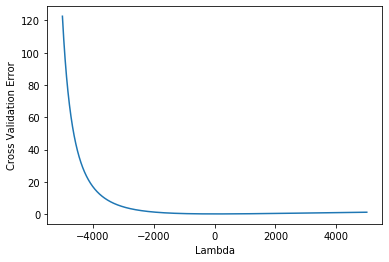

In [74]:
plt.plot(lambdavec,error)
plt.xlabel('Lambda')
plt.ylabel('Cross Validation Error')
plt.show()

In [75]:
lowestLambda = error.index(min(error))

In [76]:
print('The lowest error occurs at lambda = {}'.format(lambdavec[lowestLambda]))

The lowest error occurs at lambda = 53


# Part d

In [77]:
prediction400 = regression.intercept_ + regression.coef_*400

print("The coefficient of thermal expansion at 400K is {:.2f}".format(prediction400[0]))

The coefficient of thermal expansion at 400K is 15.90


In [78]:
ridge = Ridge(alpha=lambdavec[lowestLambda])
polynomial = PolynomialFeatures(4)
polyx = polynomial.fit_transform(X)   
ridge.fit(polyx, Y)

# Predicting the coefficient at 400 kelvin using the polynomial equation
prediction400ridge = ridge.intercept_ + ridge.coef_[1]*400 + ridge.coef_[2]*400**2 +ridge.coef_[3]*400**3 + ridge.coef_[4]*400**4

In [80]:
print("The coefficient of thermal expansion at 400K is {:.2f}".format(prediction400ridge))

The coefficient of thermal expansion at 400K is 17.48


In [81]:
mean_squared_error(Y,ridge.predict(polyx))

0.2199038458939904